# Homework 1

We will be doing our experiments and calculations on an Ubuntu 24, Windows [insert type], and [insert Bradley's machine].

In [175]:
import matplotlib.pyplot as pyplot
import numpy as np
import csv
from scipy import stats as st

## Visualization Functions

Here are the generic versions of the helper functions we will use for data visualization.

In [176]:
def load_csv(byte_size):
    filename = f"memtest{byte_size}B.csv"
    with open(filename, mode='r') as file:
        reader = csv.reader(file)
        data = []
        for row in reader:
            data.append(int(row[0]))
    return data


In [177]:
def get_data_stats(data):
    mean = sum(data)/len(data)
    std = np.std(data)
    mode = st.mode(data)
    sorted_data = sorted(data)
    
    med = sorted_data[int(len(data)/2)+1]
    return mean, med, mode, std

In [178]:
def remove_outliers(data, within_std = 2):
    mean, med, mode, std = get_data_stats(data)
    cleaned_data = []
    outliers = []
    for d in data:
        if d < mean + int(within_std*std) and d > mean - int(within_std*std):
            cleaned_data.append(d)
        else:
            outliers.append(d)
    return cleaned_data, outliers

In [179]:
#Graph showing all samples over time, add way to limit sample number displayed and where starts
def create_linear_sample_plot(data, byte_sizes, clean_outliers = True, first_sample = 0, sample_length = None):
    """Creates scatter plot of all clock cycles samples for a particular data block size.
    Parameters: data - list(ints) 
    bytes_sizes - int
    first sample (optional) - sample to start the graph"""
    
    if clean_outliers:
        data, outliers = remove_outliers(data)
    if sample_length is None:
        sample_length = len(data)
    data = data[first_sample:sample_length]
    sample_count = range(first_sample+1,first_sample+sample_length+1,1)
    
    pyplot.scatter(sample_count,data)
    
    
    pyplot.title('Clock Cycles to Copy %i Bytes' % byte_sizes)
    pyplot.xlabel('Trial')
    pyplot.ylabel('Clock Cycles')
    pyplot.show()
    return data, outliers

In [180]:
def frequency_dictionary(data):
    counts = {}
    for d in data:
        if d not in counts.keys():
            counts[d] = 1
        else:
            counts[d] = counts[d] + 1
    return counts

In [181]:
def get_top_most_freq_clock_counts(data, top_n = 10):
    counts = frequency_dictionary(data)
    sorted_items = sorted(counts.items(), key=lambda item: item[1],reverse=True)

    # Convert the sorted list of tuples back into a dictionary
  
    sorted_dict = dict(sorted_items[0:top_n])
  
   
    return sorted_dict

In [182]:
#Create histogram
def create_histogram(data, byte_size, is_outliers = False, clean_outliers = True, within_std = 2):
    outliers = []
    cleaned_data = data
    if clean_outliers:
        cleaned_data, outliers = remove_outliers(data,within_std)
    
    
    pyplot.hist(cleaned_data, bins='auto')
    pyplot.title('Histogram of Clock Cycles for '+str(byte_size)+' Bytes with '+str(within_std)+' STD of the Mean')
    if is_outliers:
        pyplot.title('Histogram of Outlier Clock Cycles for '+str(byte_size)+' Bytes with '+str(within_std)+' STD of the Mean')
    pyplot.xlabel('Clock Cycles')
    pyplot.ylabel('Frequency')
    pyplot.show()
    return data, outliers

In [183]:
def produce_stats(byte_size):
    data = load_csv(byte_size)
    cleaned_data, outliers = create_linear_sample_plot(data,byte_size)
    cleaned_histo_data, histo_outliers = create_histogram(data,byte_size,is_outliers = False, clean_outliers = True, within_std = 2)
    d, o = create_histogram(histo_outliers,byte_size,is_outliers = True, clean_outliers = False, within_std = 2)
    cleaned_histo_data, histo_outliers = create_histogram(data,byte_size,is_outliers = False, clean_outliers = True, within_std = 1)
    d, o = create_histogram(histo_outliers,byte_size,is_outliers = True, clean_outliers = False, within_std = 1)
    cleaned_histo_data, histo_outliers = create_histogram(data,byte_size,is_outliers = False, clean_outliers = True, within_std = 0.4)
    d, o = create_histogram(histo_outliers,byte_size,is_outliers = True, clean_outliers = False, within_std = 0.4)
    avg, med, mode, std = get_data_stats(data)
    print("Stats for "+str(byte_size)+" ")
    print("Mean: "+str(avg))
    print("Median: "+str(med))
    print("Mode: "+str(mode[0]))
    print("Standard Deviation: "+str(std))
    d = get_top_most_freq_clock_counts(data,10)
    print("Top Ten Most Common Clock Cycles for "+str(byte_size)+" bytes copied: "+str(d))

## Ubuntu 24
### Question 1
#### 64 Bytes of data copied

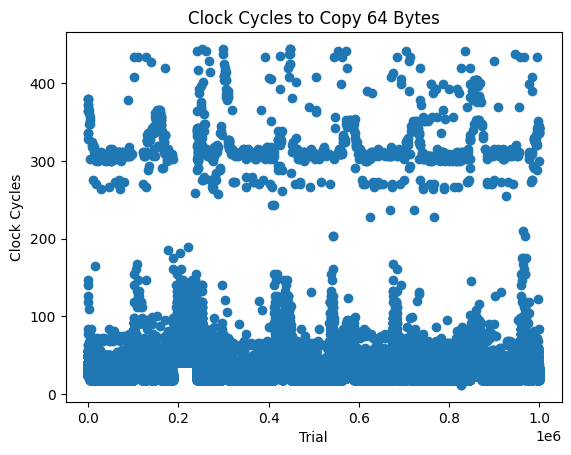

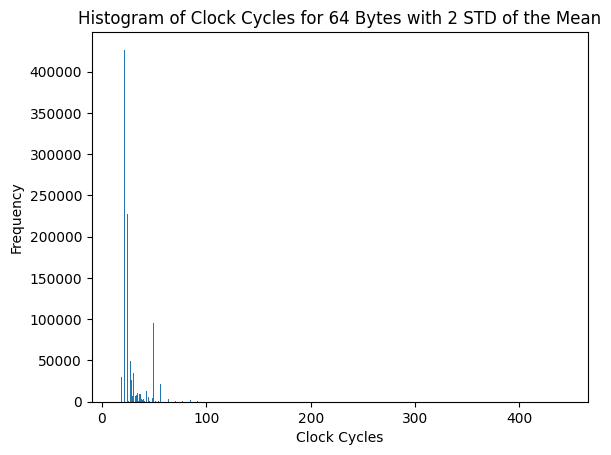

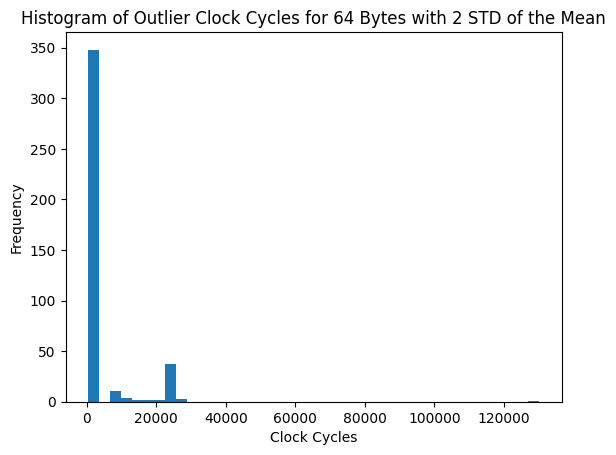

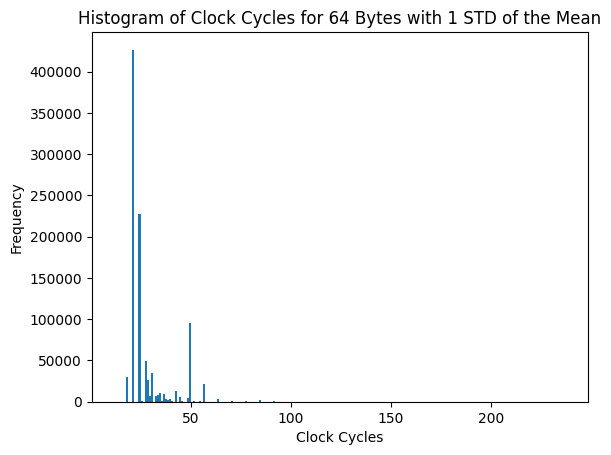

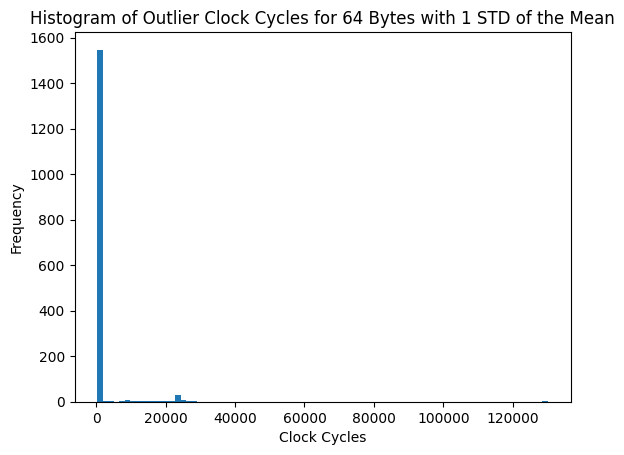

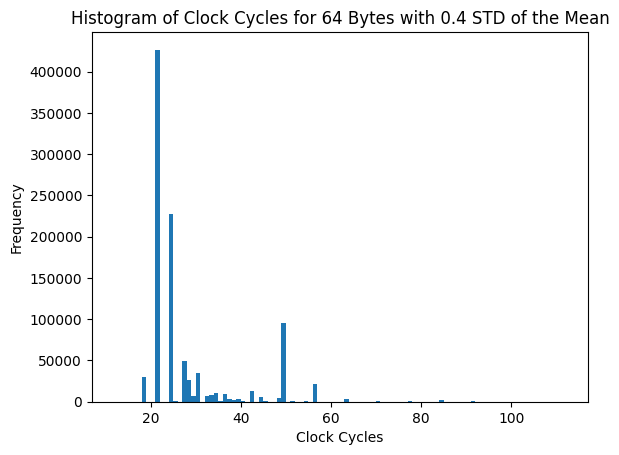

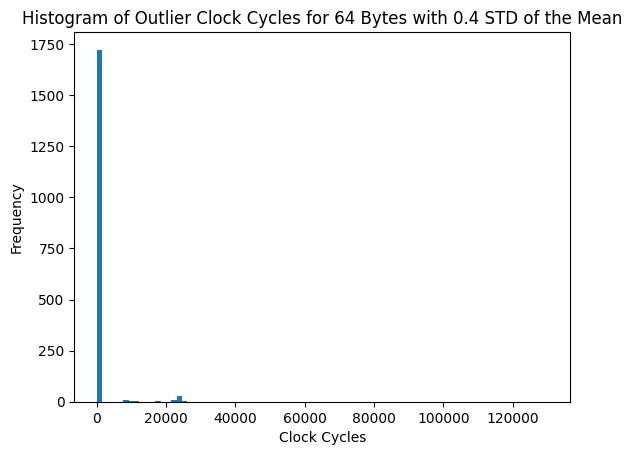

Stats for 64 
Mean: 29.500888
Median: 24
Mode: 21
Standard Deviation: 208.73946471429753
Top Ten Most Common Clock Cycles for 64 bytes copied: {21: 426523, 24: 227612, 49: 95652, 27: 48942, 30: 34734, 18: 29405, 28: 26295, 56: 21907, 42: 13508, 34: 10292}


In [184]:
produce_stats(64)

#### 128 bytes

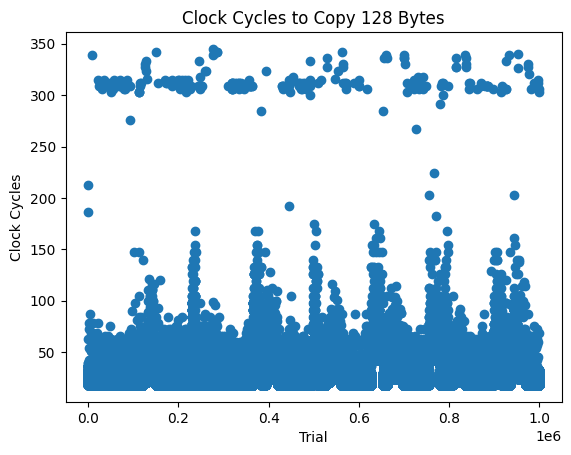

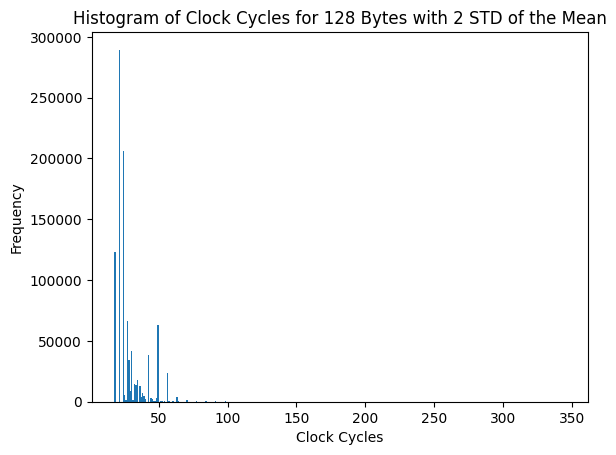

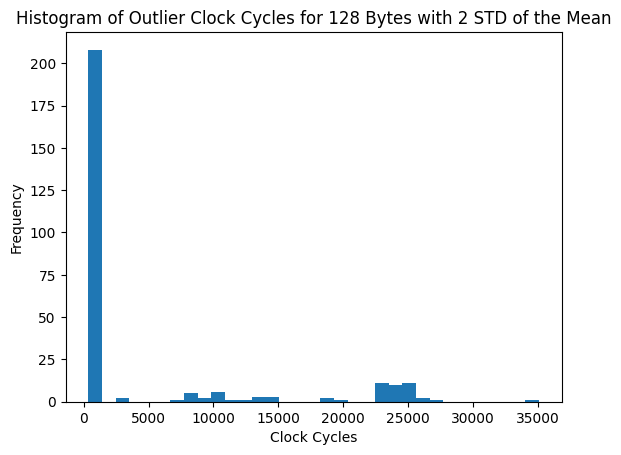

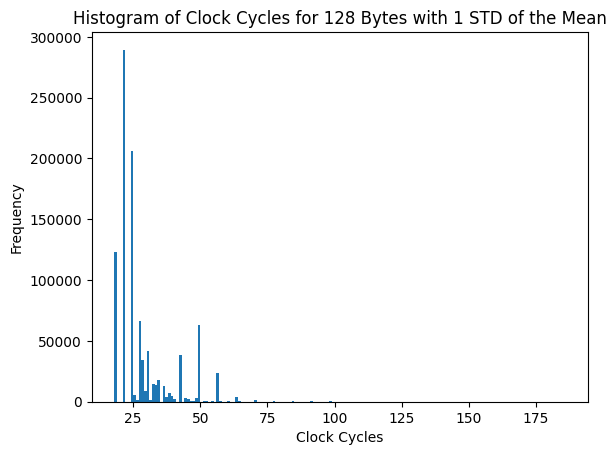

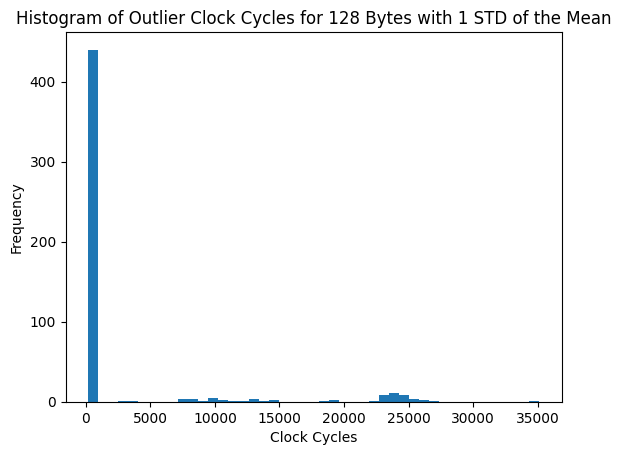

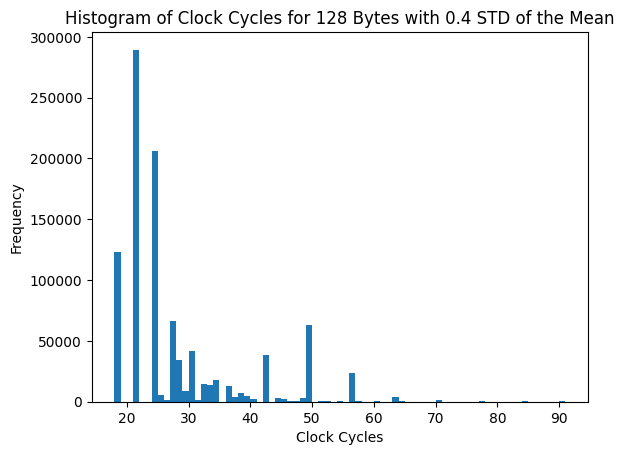

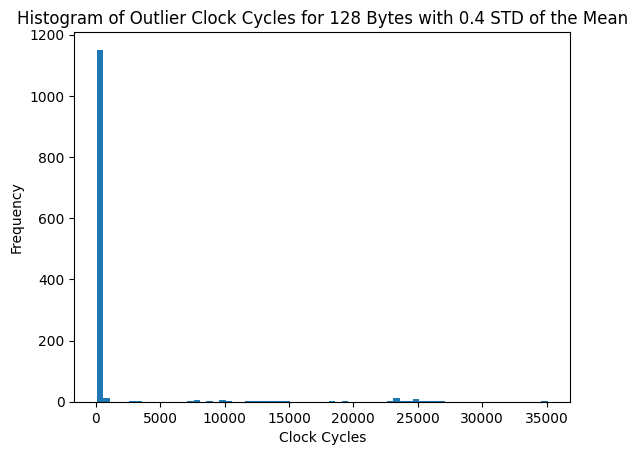

Stats for 128 
Mean: 28.892744
Median: 24
Mode: 21
Standard Deviation: 159.96486738077976
Top Ten Most Common Clock Cycles for 128 bytes copied: {21: 289376, 24: 206476, 18: 123326, 27: 66113, 49: 62967, 30: 41563, 42: 38370, 28: 34565, 56: 23816, 34: 17824}


In [185]:
produce_stats(128)

#### 256 Bytes

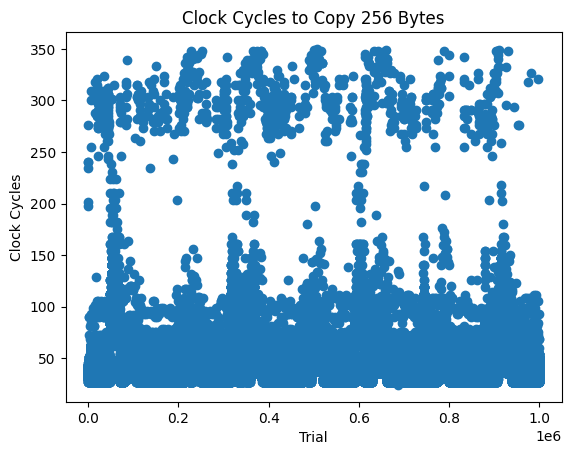

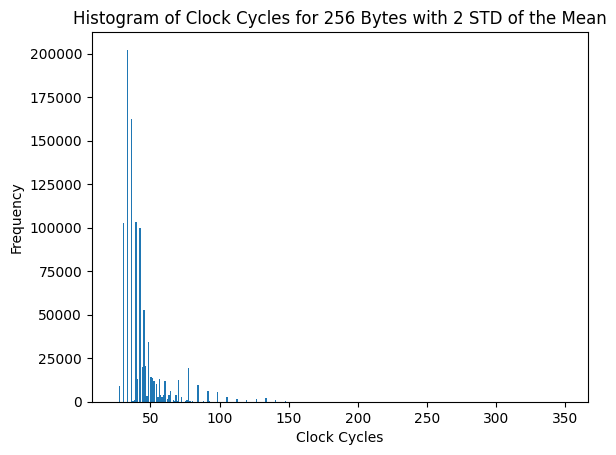

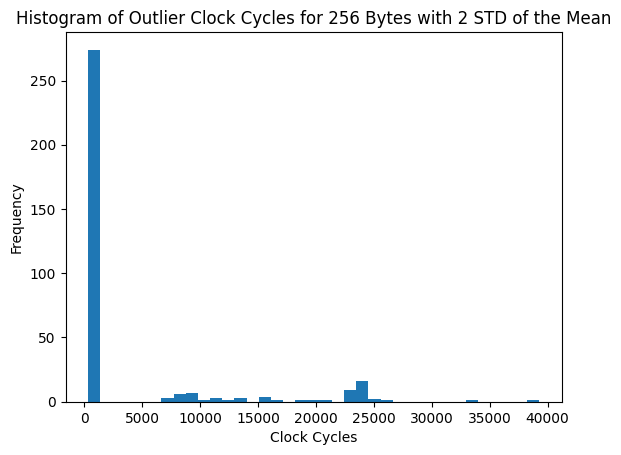

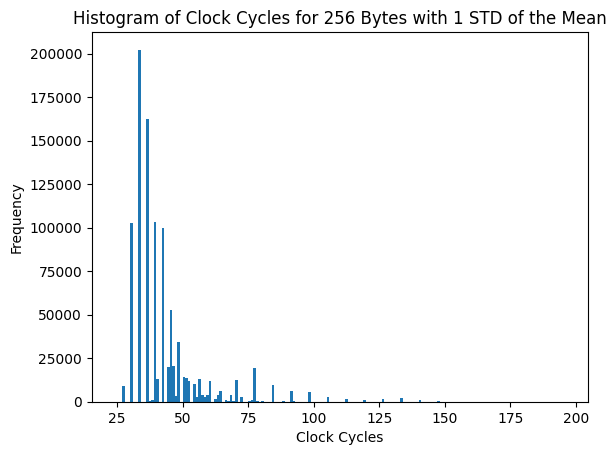

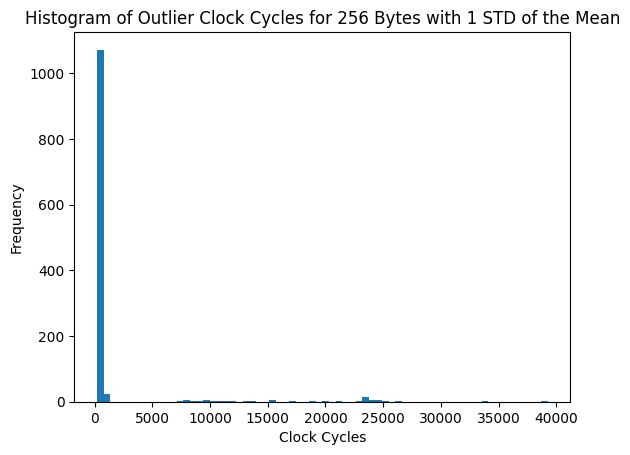

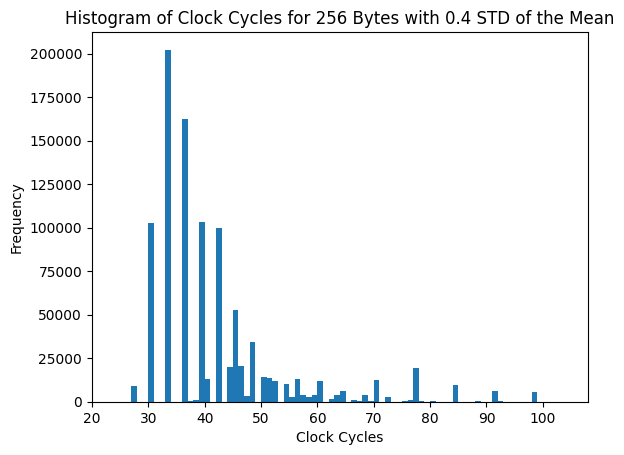

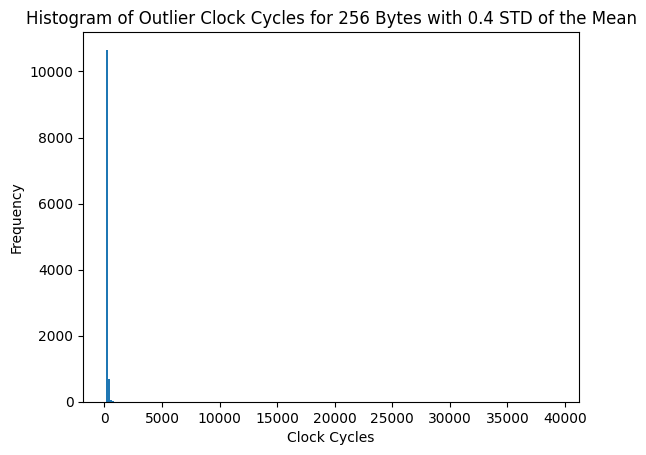

Stats for 256 
Mean: 43.991684
Median: 39
Mode: 33
Standard Deviation: 153.80419317055095
Top Ten Most Common Clock Cycles for 256 bytes copied: {33: 202234, 36: 162427, 39: 103251, 30: 102629, 42: 100018, 45: 52867, 48: 34533, 46: 20495, 44: 19850, 77: 19303}


In [186]:
produce_stats(256)

#### 512 Bytes

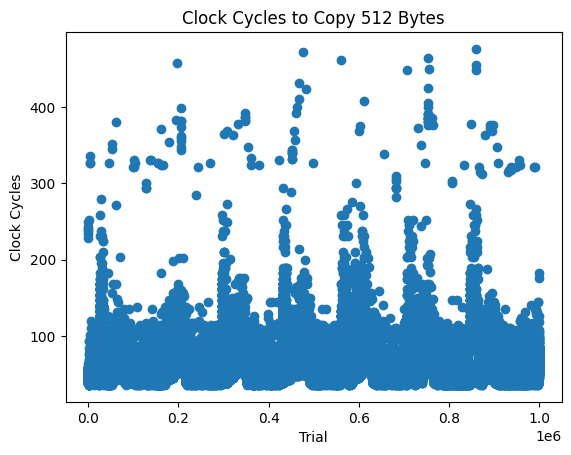

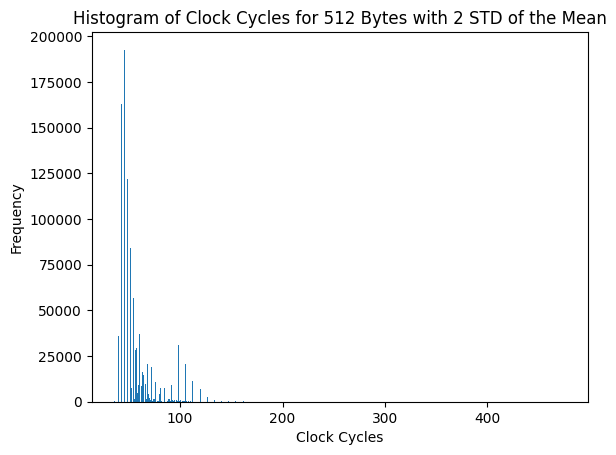

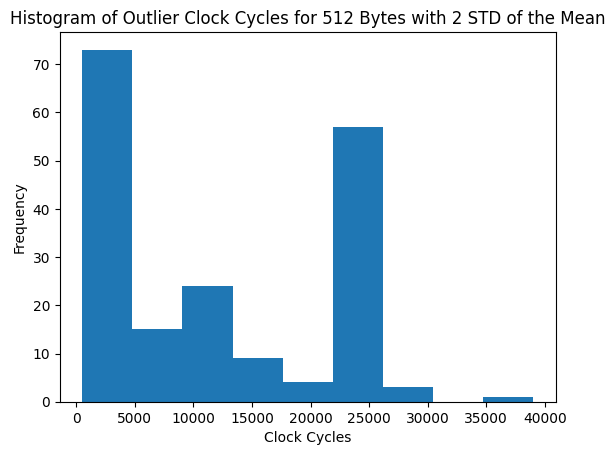

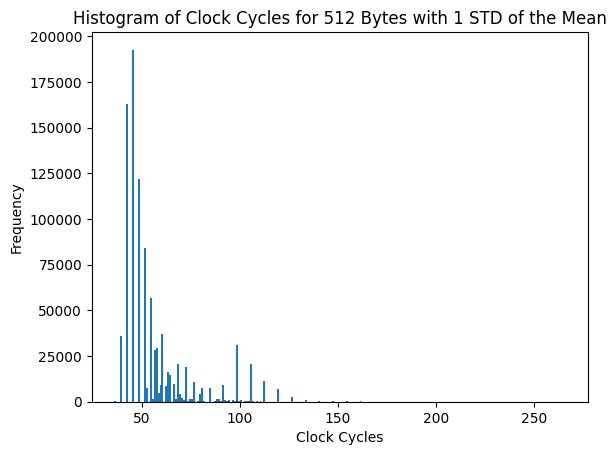

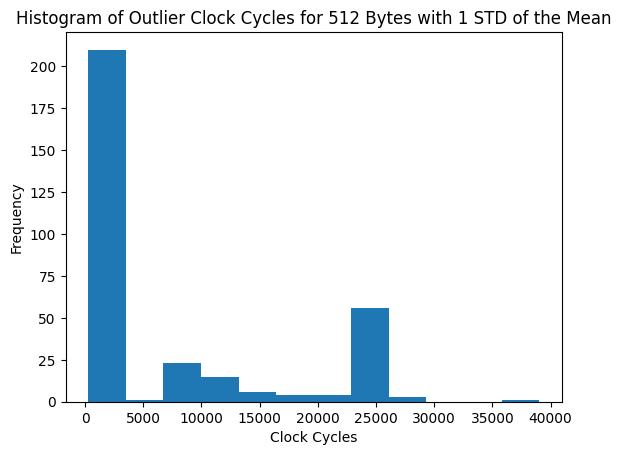

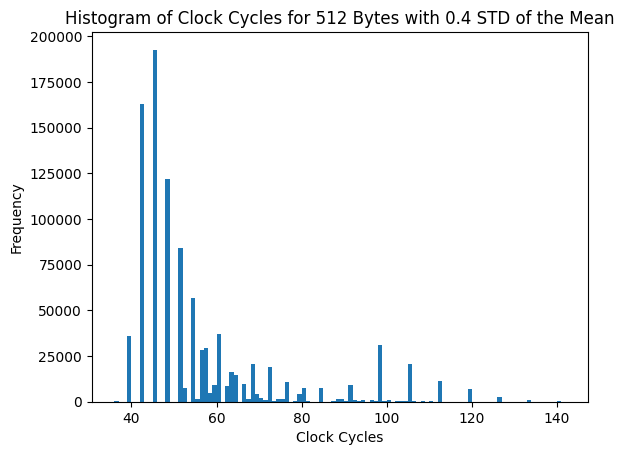

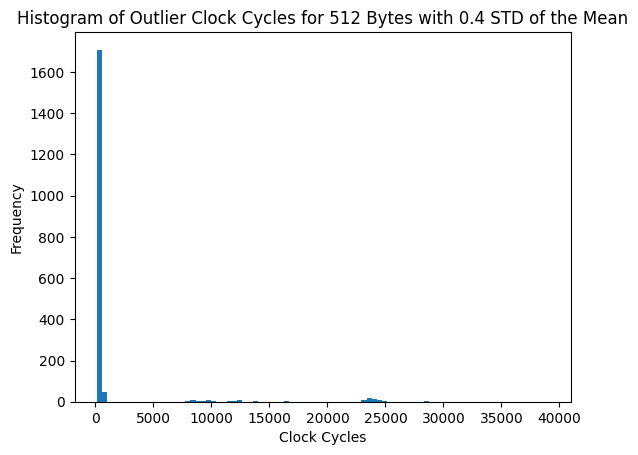

Stats for 512 
Mean: 58.26594
Median: 48
Mode: 45
Standard Deviation: 210.49402566323917
Top Ten Most Common Clock Cycles for 512 bytes copied: {45: 192734, 42: 162916, 48: 121827, 51: 84300, 54: 57028, 60: 36939, 39: 35722, 98: 30938, 57: 29482, 56: 28584}


In [187]:
produce_stats(512)

#### 1024 Bytes

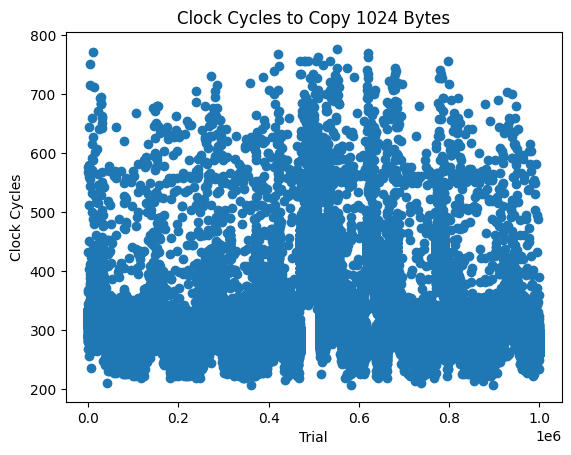

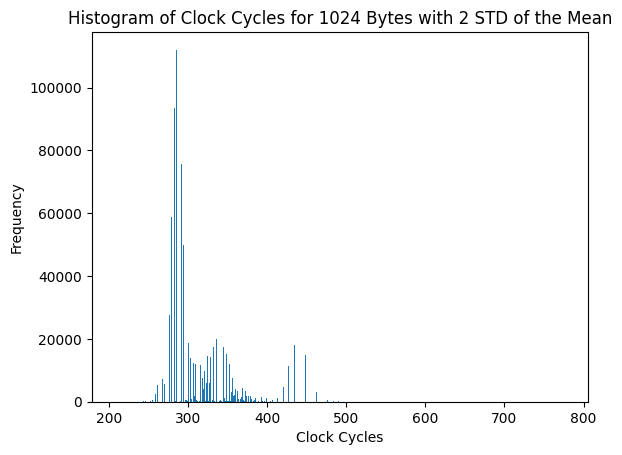

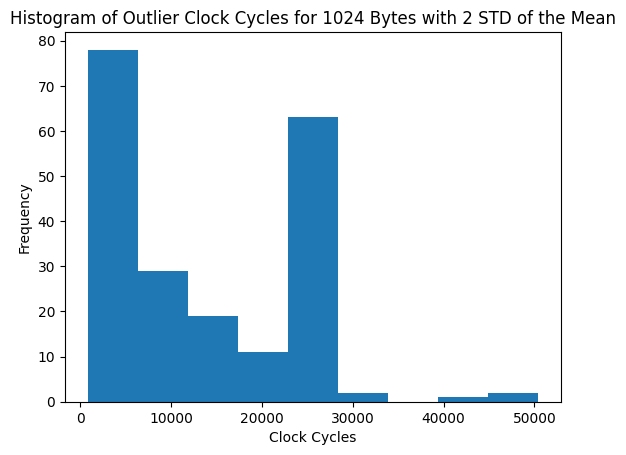

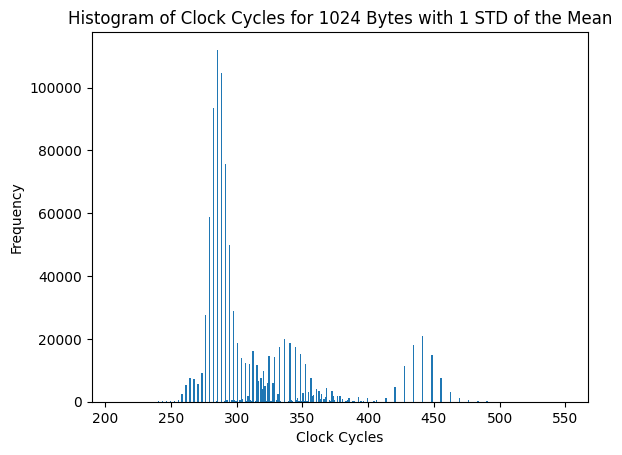

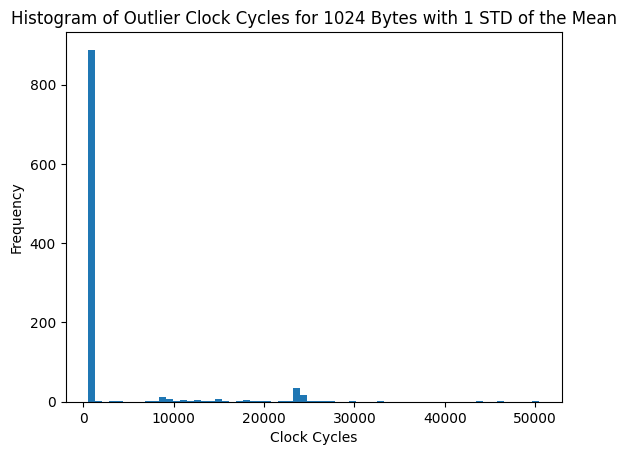

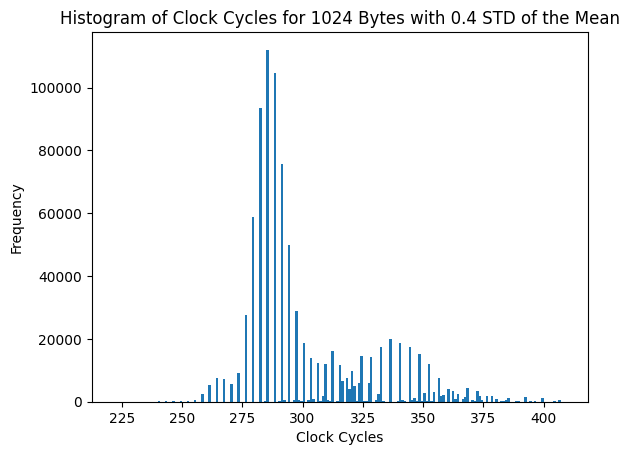

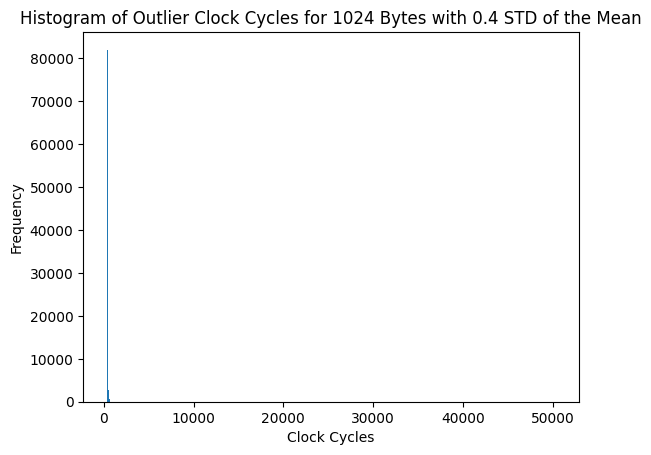

Stats for 1024 
Mean: 315.826049
Median: 291
Mode: 285
Standard Deviation: 236.33541169289379
Top Ten Most Common Clock Cycles for 1024 bytes copied: {285: 112027, 288: 104701, 282: 93516, 291: 75809, 279: 58921, 294: 49728, 297: 28928, 276: 27699, 441: 20843, 336: 19958}


In [188]:
produce_stats(1024)

#### 2048 Bytes

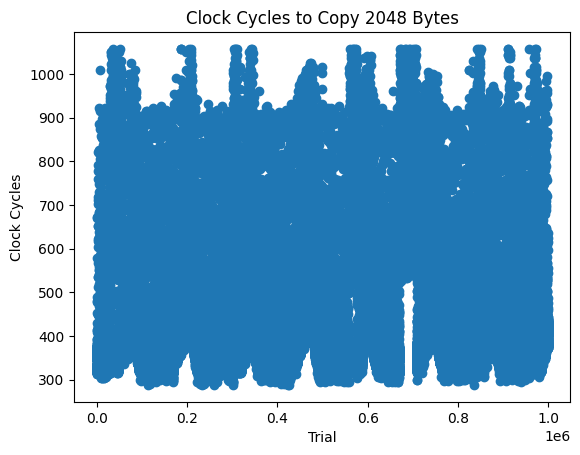

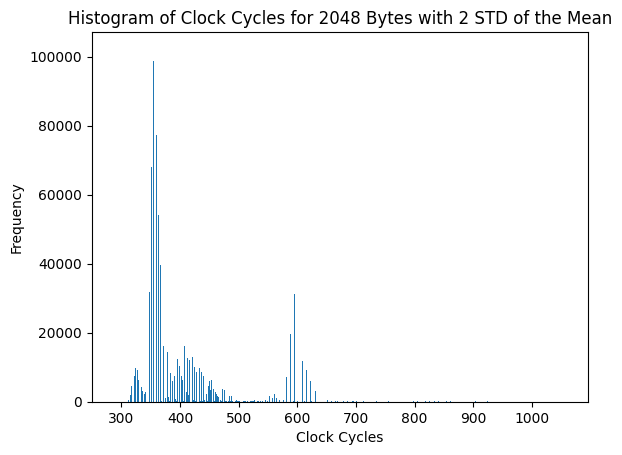

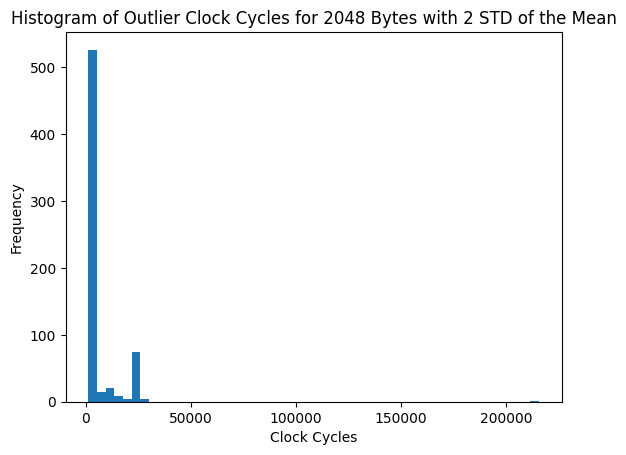

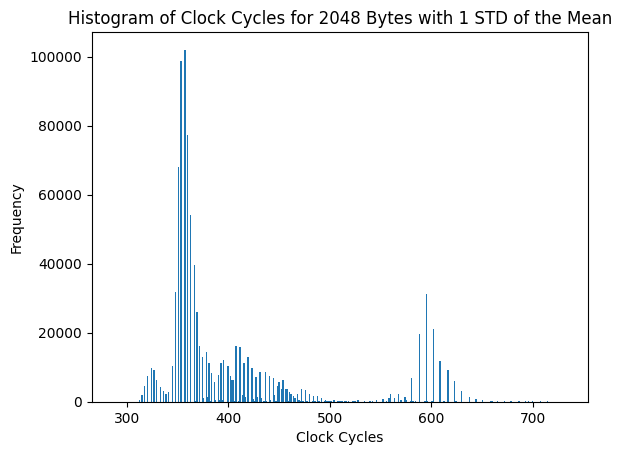

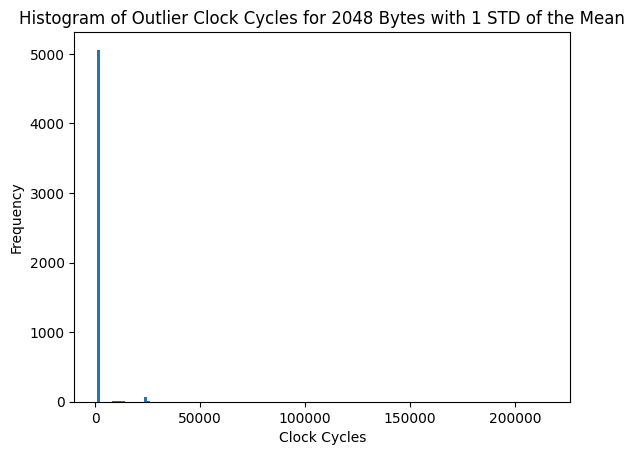

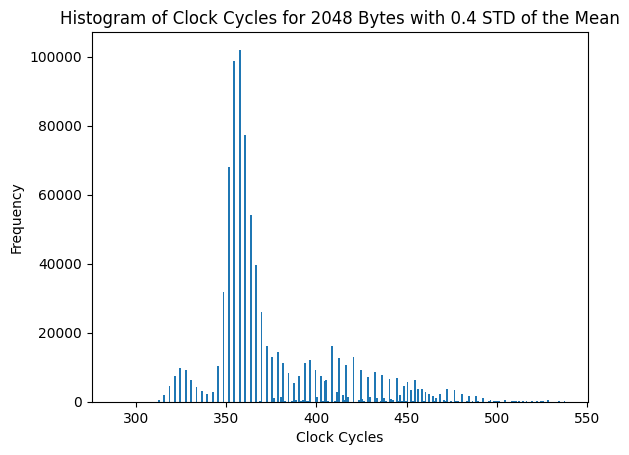

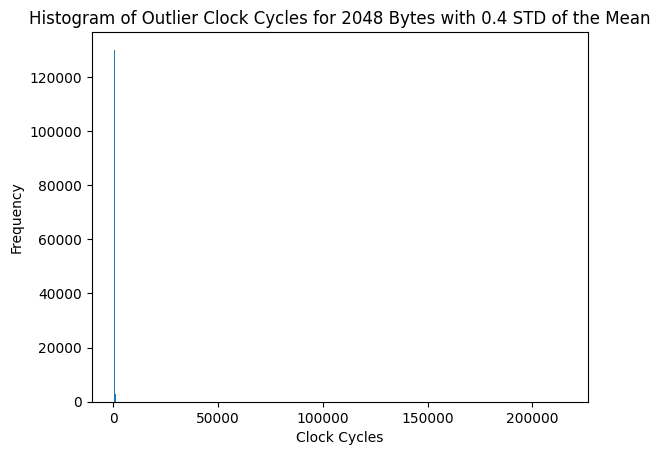

Stats for 2048 
Mean: 409.736294
Median: 366
Mode: 357
Standard Deviation: 324.7362853534319
Top Ten Most Common Clock Cycles for 2048 bytes copied: {357: 102020, 354: 98839, 360: 77387, 351: 68142, 363: 54185, 366: 39667, 348: 31942, 595: 31260, 369: 25910, 602: 21133}


In [189]:
produce_stats(2048)

#### 4096 Bytes

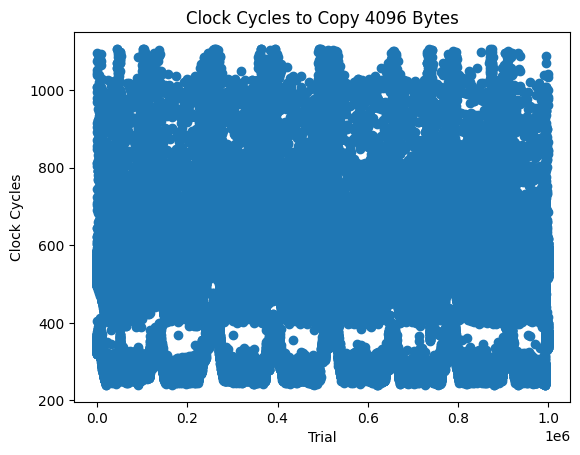

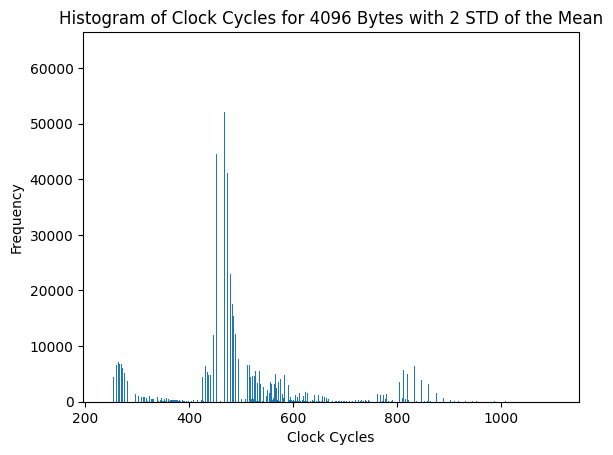

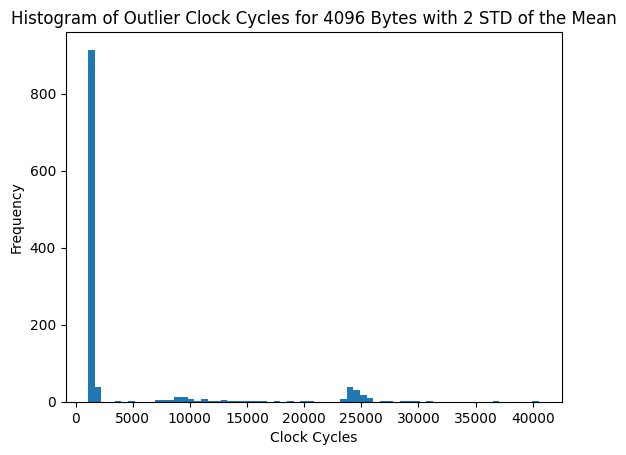

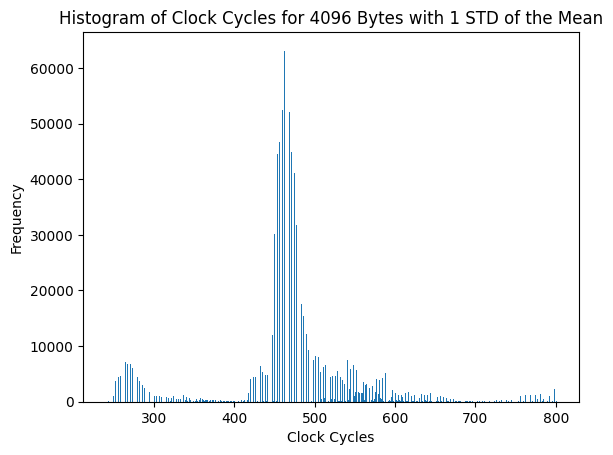

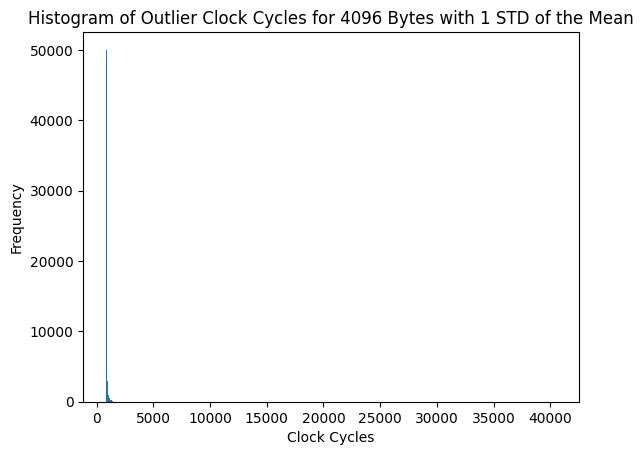

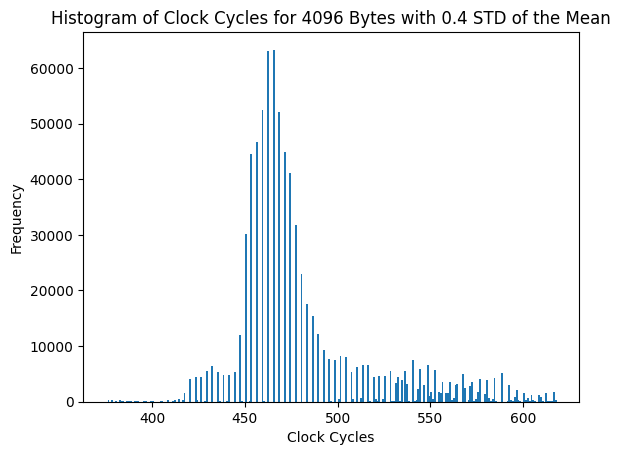

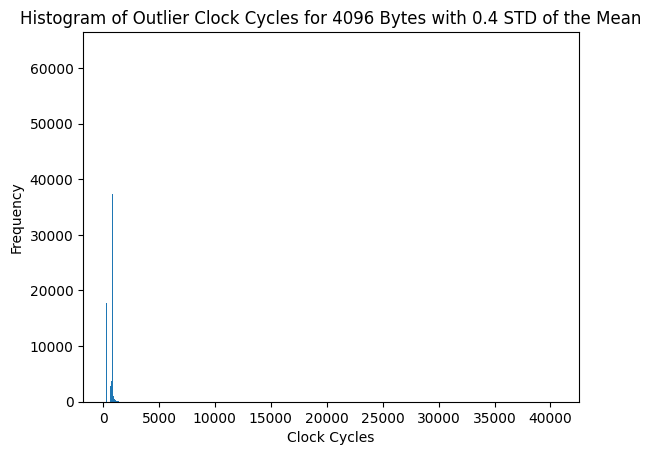

Stats for 4096 
Mean: 496.472731
Median: 468
Mode: 465
Standard Deviation: 305.7514539759404
Top Ten Most Common Clock Cycles for 4096 bytes copied: {465: 63286, 462: 62985, 459: 52380, 468: 52117, 456: 46613, 471: 44976, 453: 44478, 474: 41126, 477: 31858, 450: 30083}


In [190]:
produce_stats(4096)

#### 8192 Bytes

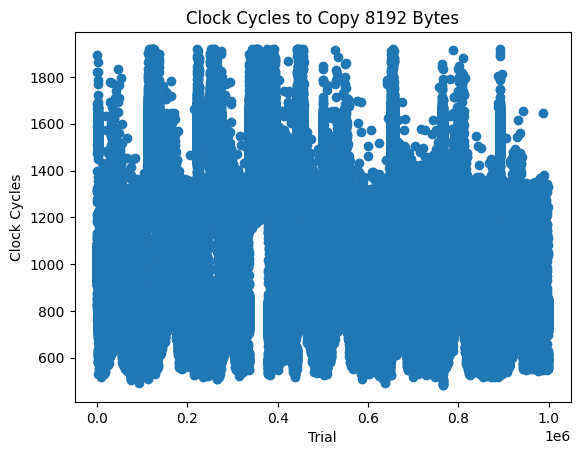

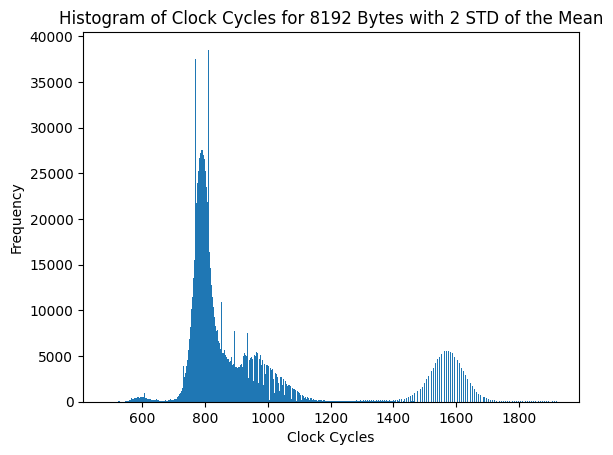

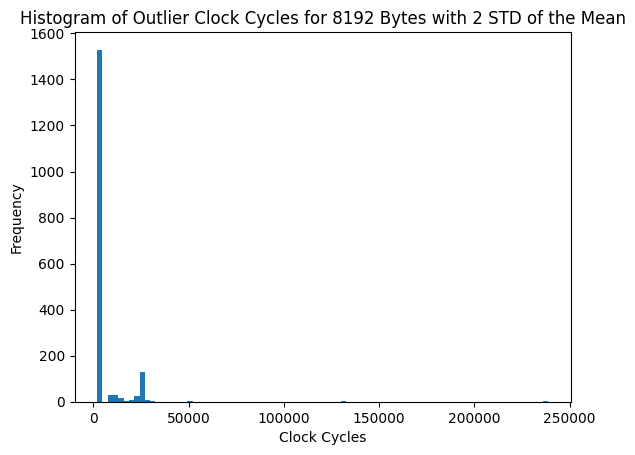

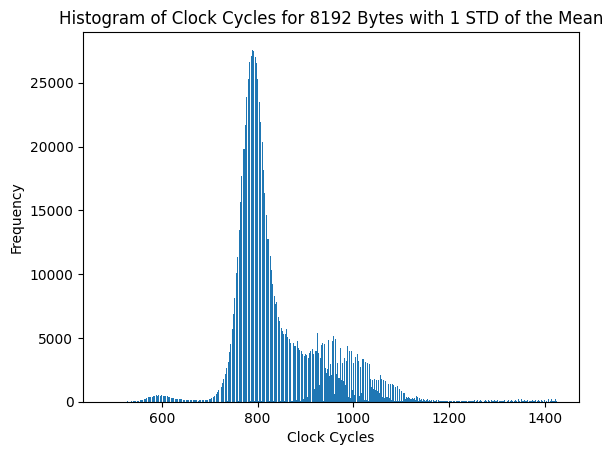

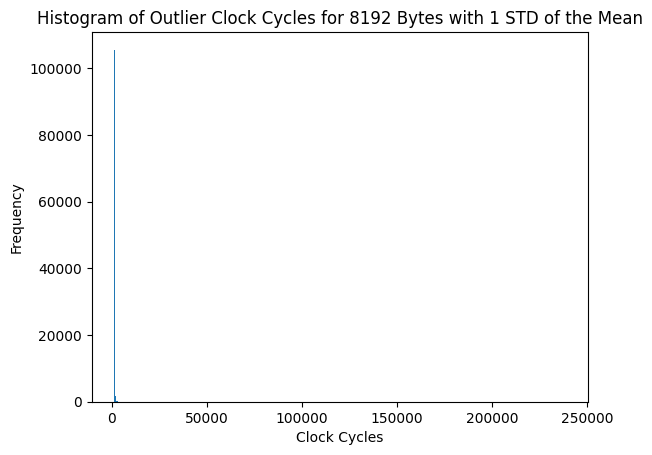

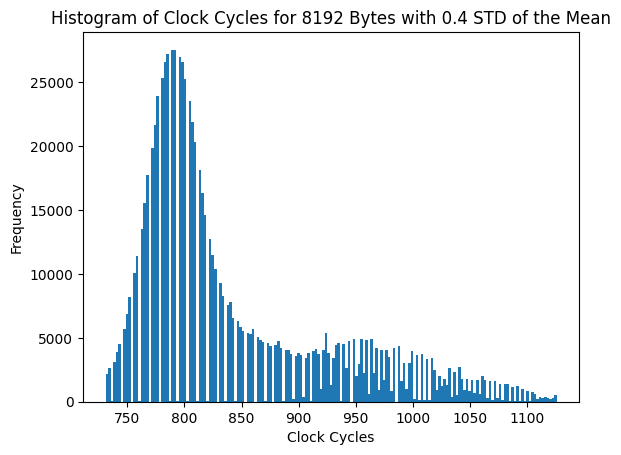

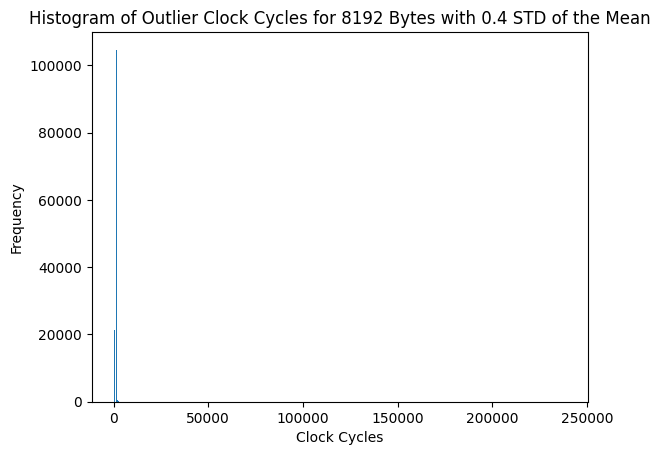

Stats for 8192 
Mean: 928.478339
Median: 816
Mode: 789
Standard Deviation: 496.4622045642559
Top Ten Most Common Clock Cycles for 8192 bytes copied: {789: 27513, 792: 27499, 786: 27121, 795: 26967, 783: 26612, 798: 26550, 780: 25296, 801: 25214, 777: 23850, 804: 23501}


In [191]:
produce_stats(8192)

#### 16384 Bytes

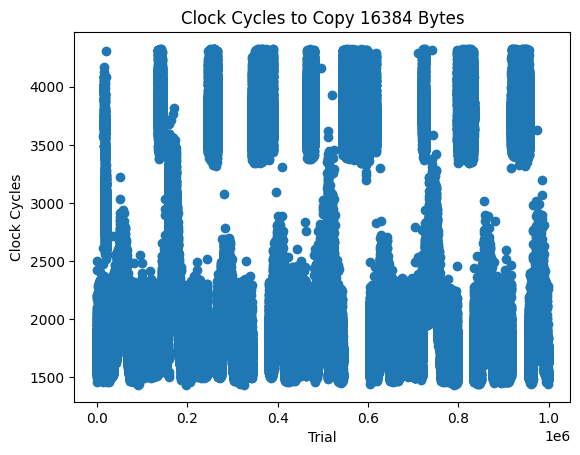

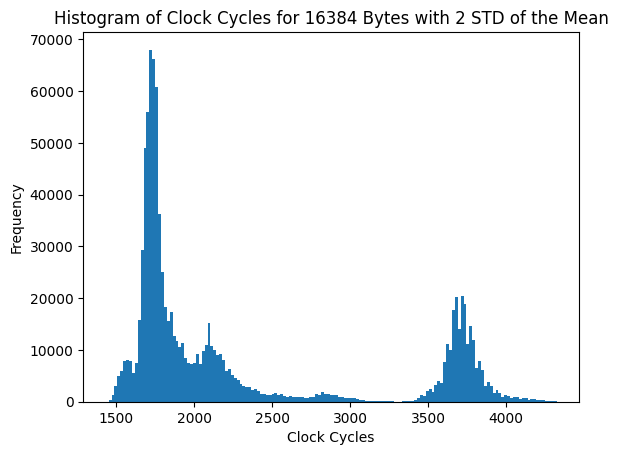

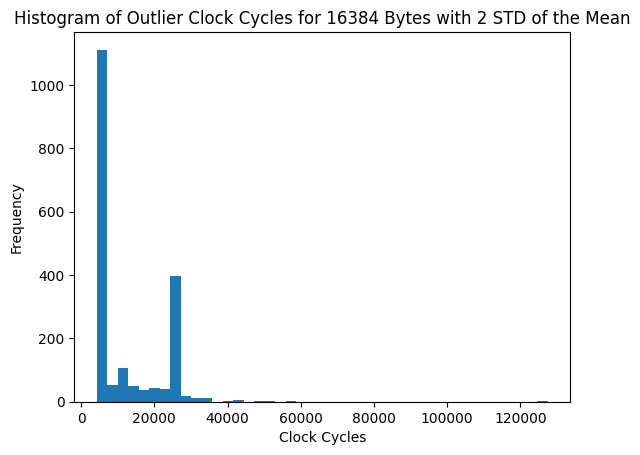

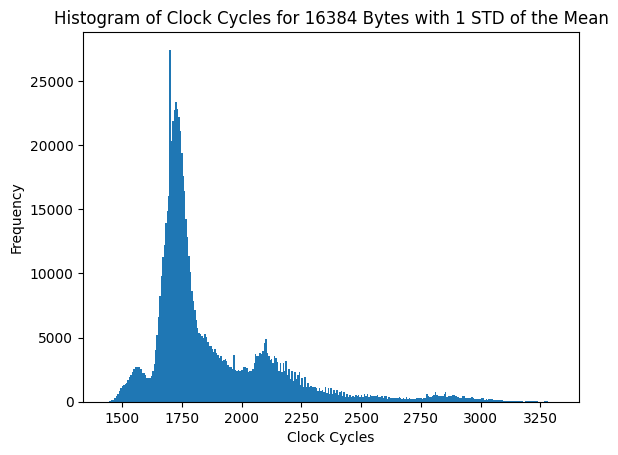

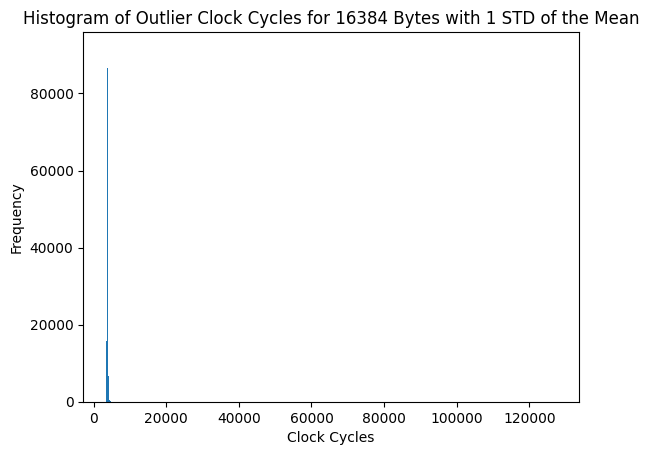

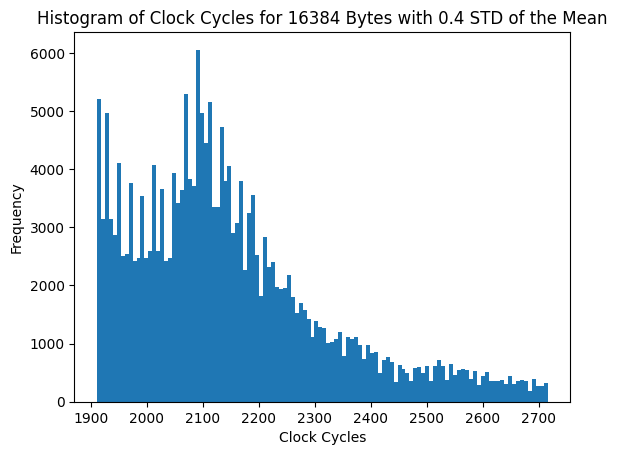

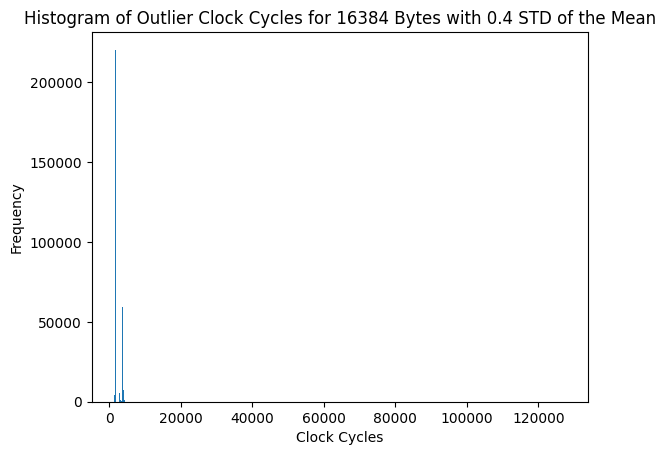

Stats for 16384 
Mean: 2313.361011
Median: 1848
Mode: 1728
Standard Deviation: 1007.9405210676163
Top Ten Most Common Clock Cycles for 16384 bytes copied: {1728: 11788, 1725: 11595, 1722: 11509, 1731: 11435, 1734: 11418, 1719: 11226, 1737: 11171, 1716: 11073, 1740: 11029, 1713: 10794}


In [192]:
produce_stats(16384)

#### 32768 Bytes

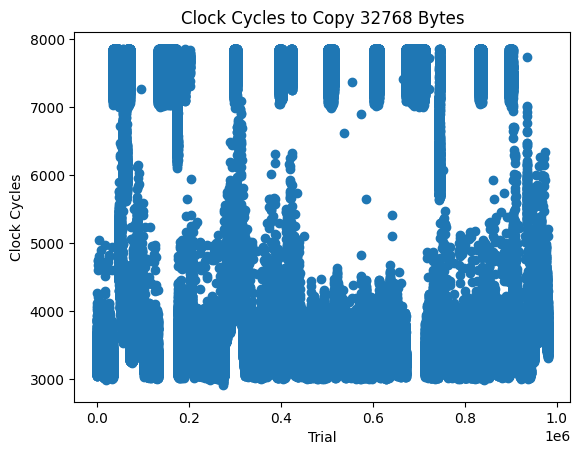

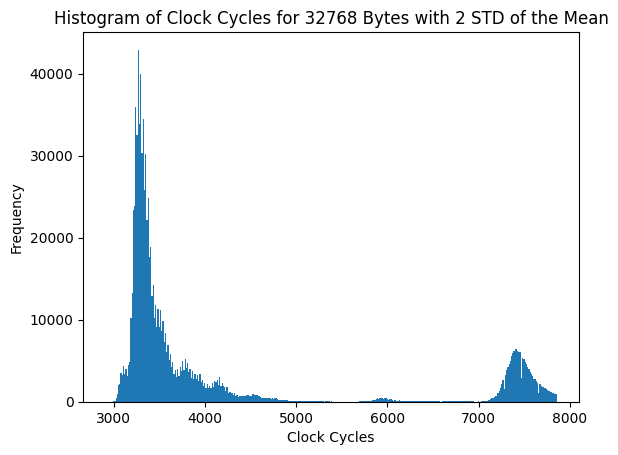

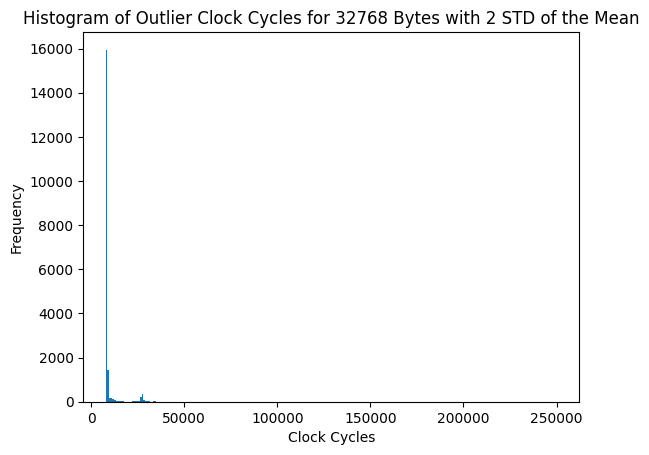

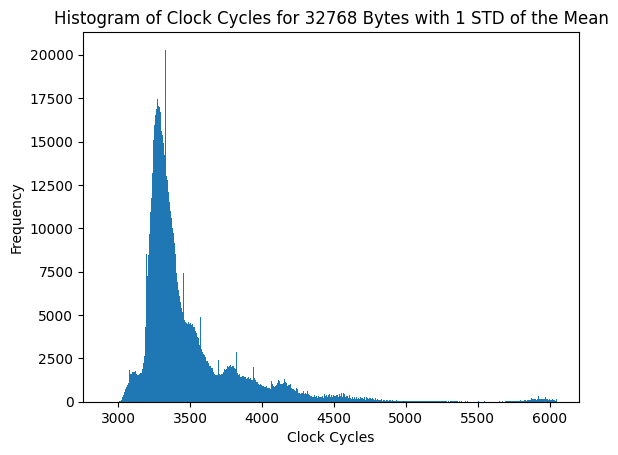

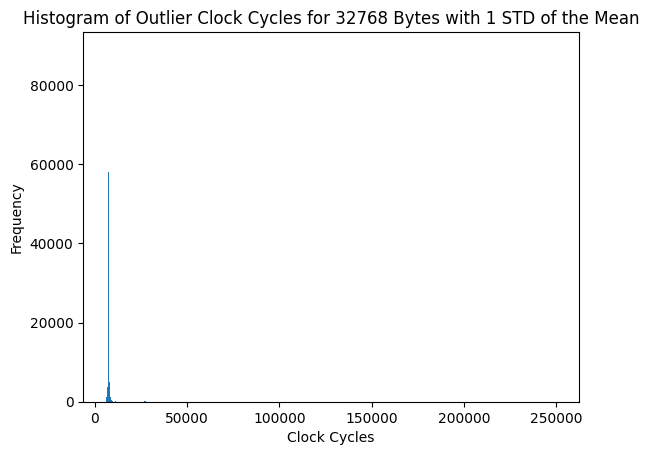

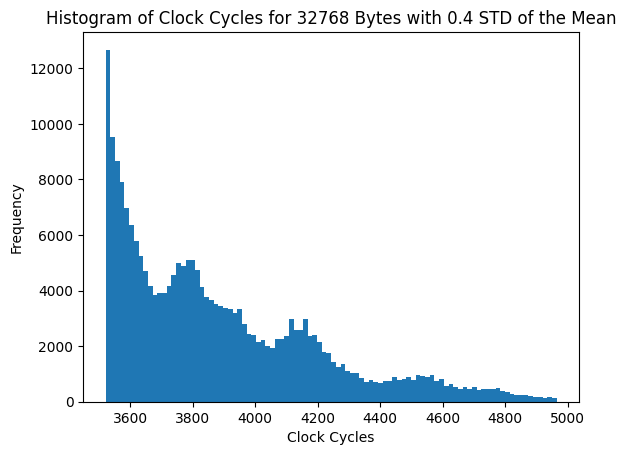

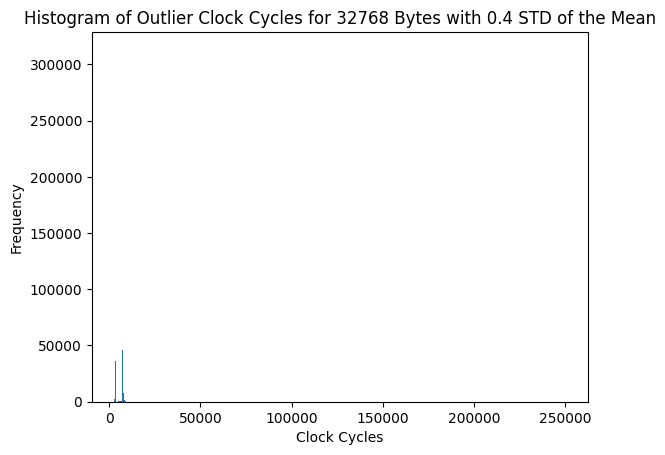

Stats for 32768 
Mean: 4243.701246
Median: 3414
Mode: 3270
Standard Deviation: 1805.5501899831108
Top Ten Most Common Clock Cycles for 32768 bytes copied: {3270: 8739, 3273: 8700, 3276: 8574, 3282: 8488, 3285: 8487, 3279: 8470, 3261: 8465, 3264: 8457, 3288: 8455, 3267: 8435}


In [193]:
produce_stats(32768)

#### 65,536 Bytes

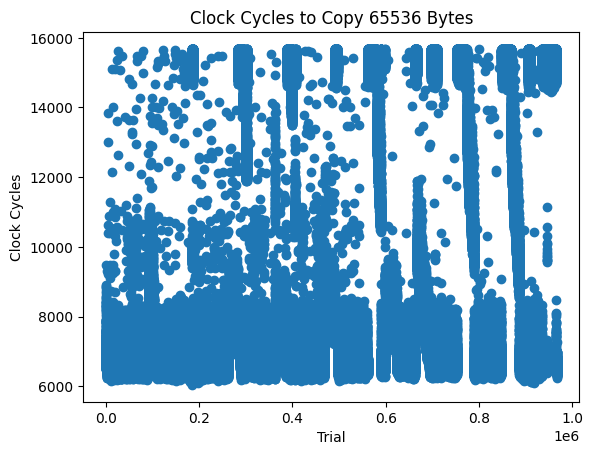

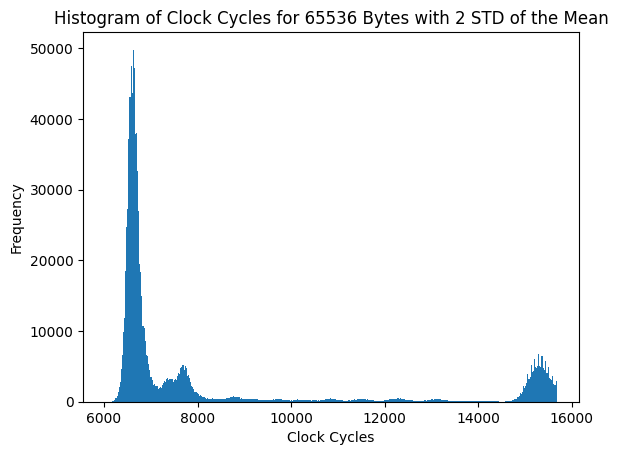

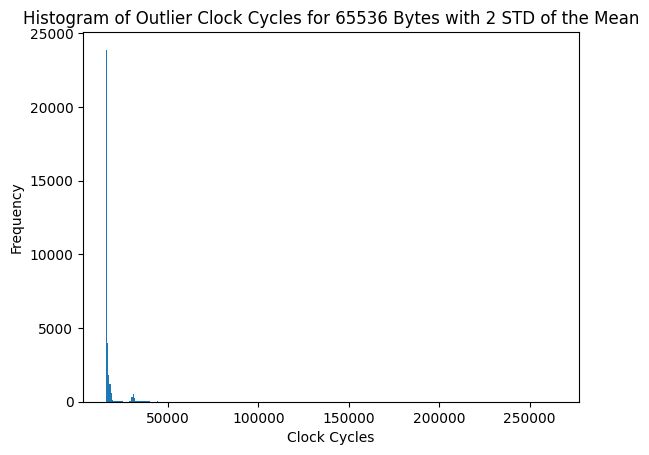

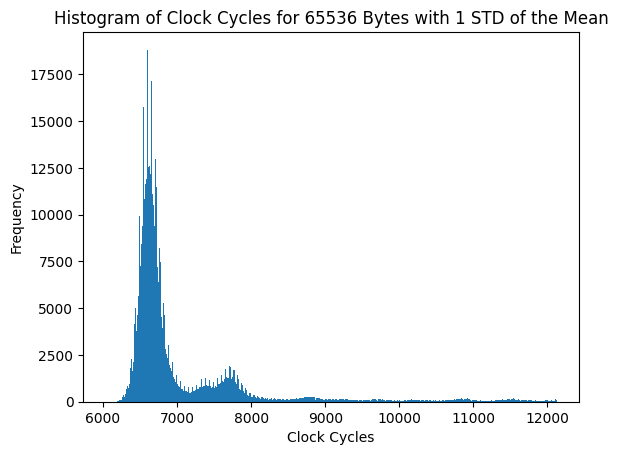

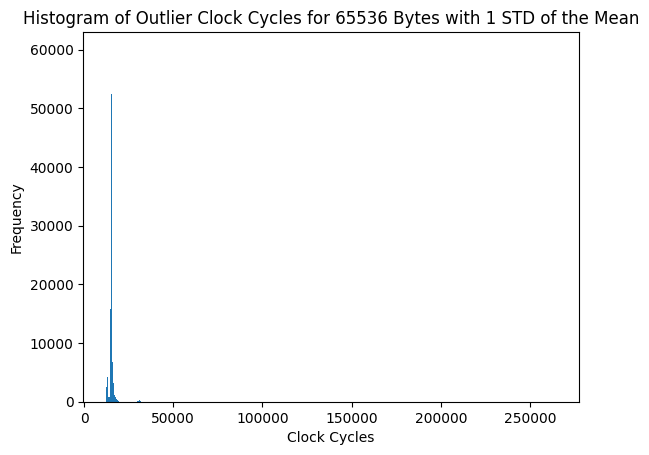

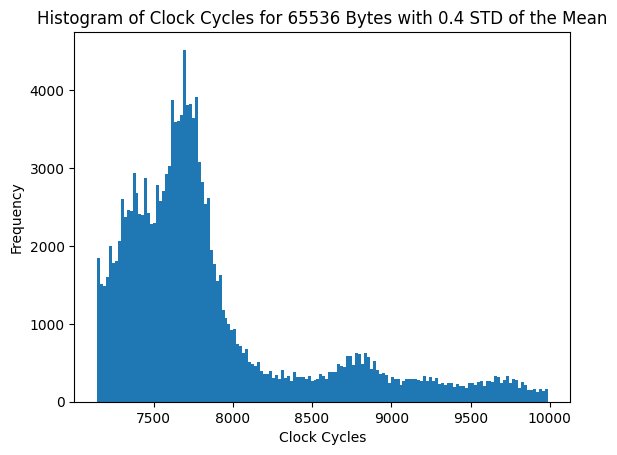

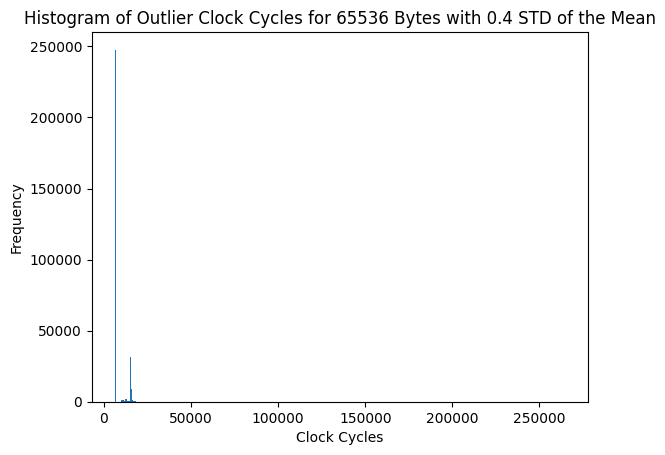

Stats for 65536 
Mean: 8565.814301
Median: 6741
Mode: 6603
Standard Deviation: 3559.304729774184
Top Ten Most Common Clock Cycles for 65536 bytes copied: {6603: 6427, 6624: 6303, 6612: 6303, 6627: 6295, 6618: 6288, 6621: 6285, 6600: 6249, 6609: 6227, 6630: 6219, 6615: 6187}


In [194]:
produce_stats(65536)

#### 1,048,576 Bytes

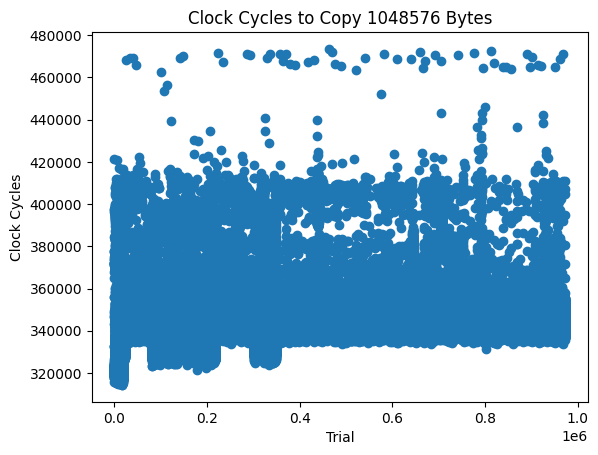

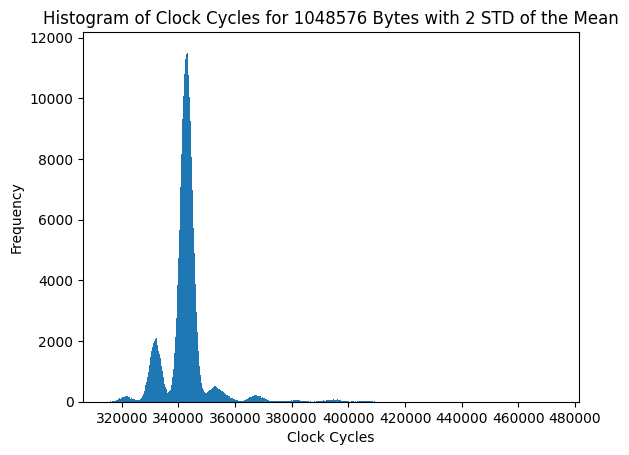

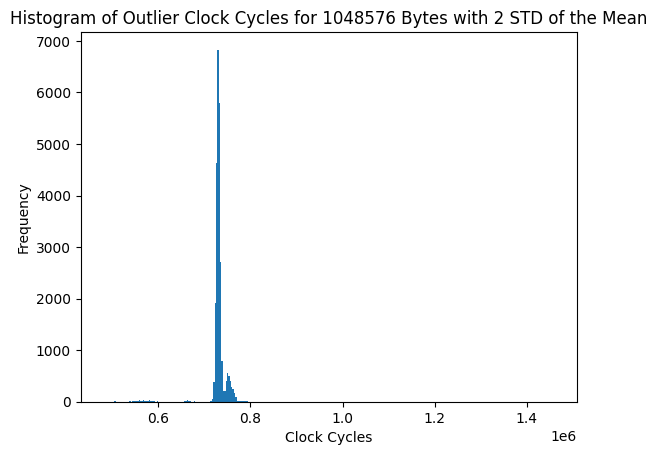

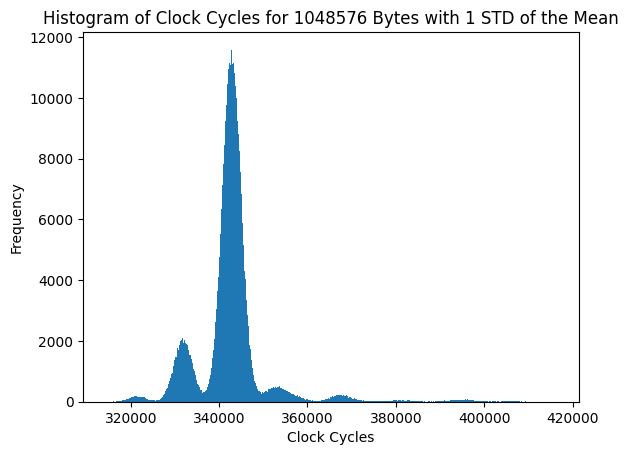

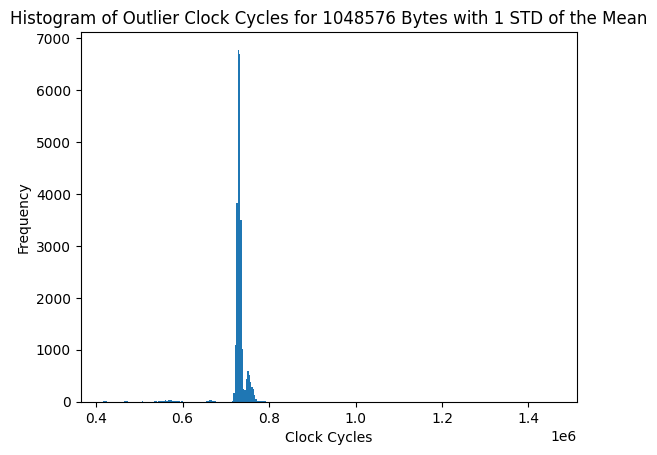

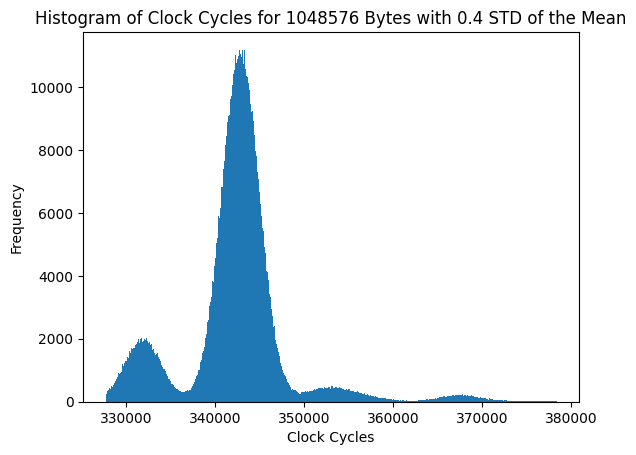

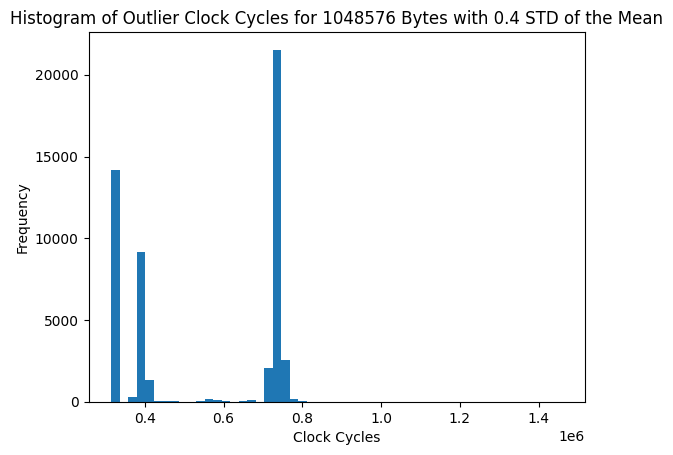

Stats for 1048576 
Mean: 353055.337718
Median: 342717
Mode: 342846
Standard Deviation: 63377.86999764054
Top Ten Most Common Clock Cycles for 1048576 bytes copied: {342846: 480, 343152: 475, 342795: 470, 342936: 469, 342957: 466, 343170: 465, 343146: 465, 343056: 462, 342636: 462, 342798: 461}


In [195]:
produce_stats(1048576)

#### 2,097,152 Bytes

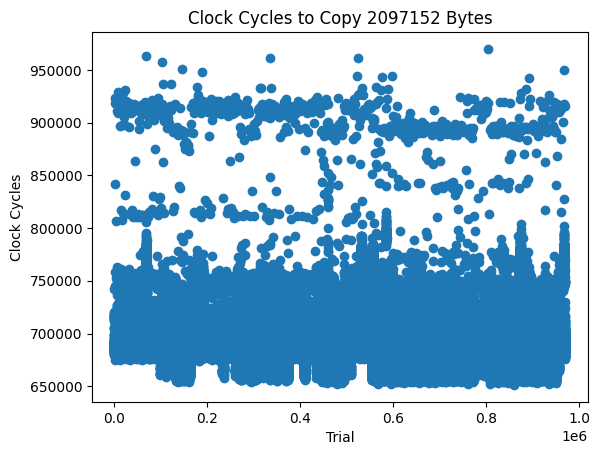

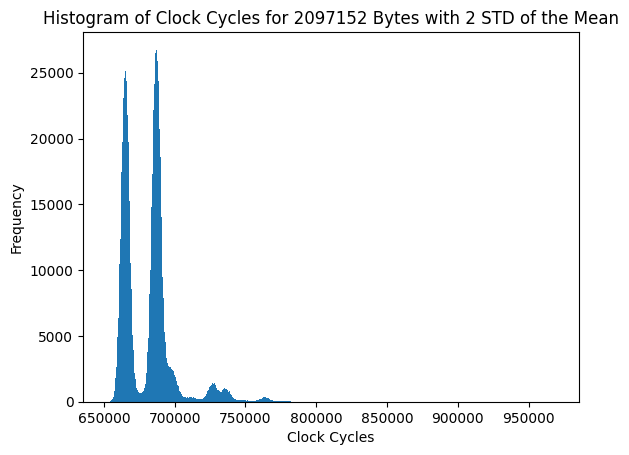

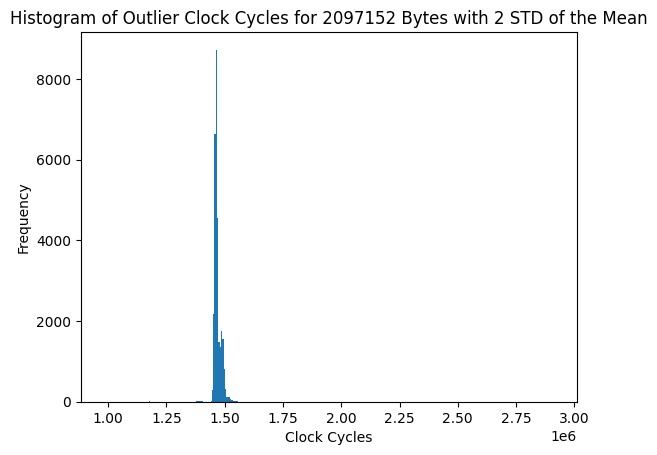

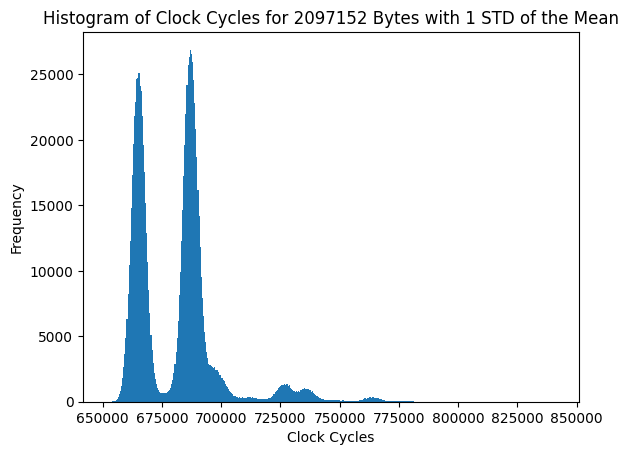

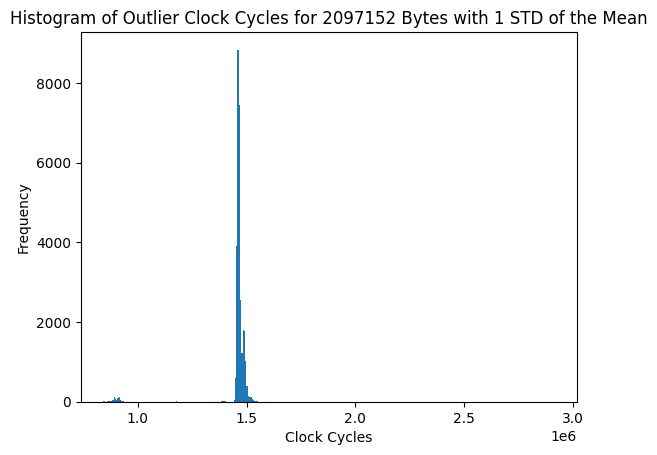

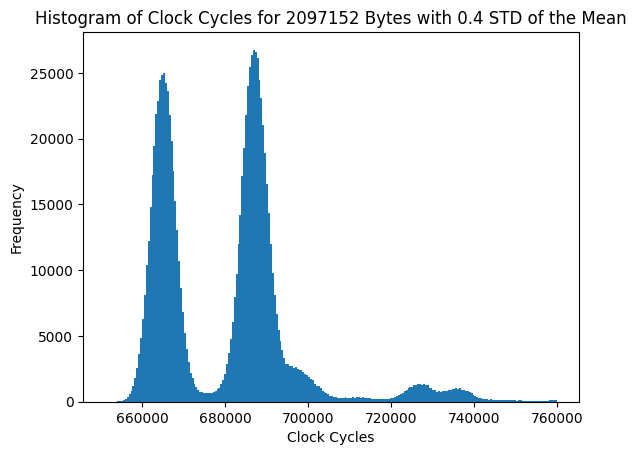

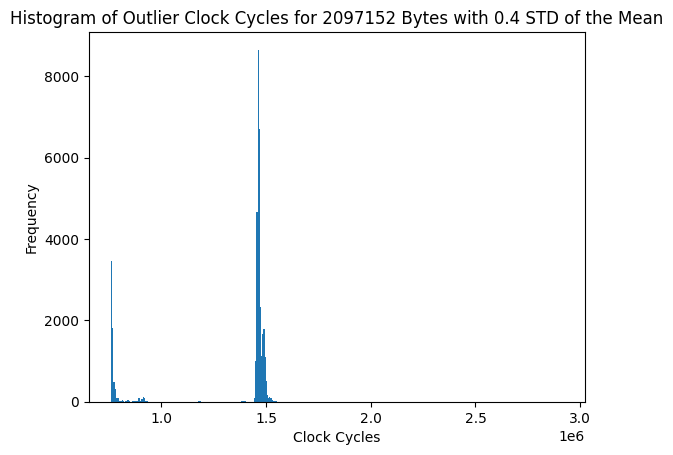

Stats for 2097152 
Mean: 705278.251335
Median: 684465
Mode: 686901
Standard Deviation: 136407.74269796512
Top Ten Most Common Clock Cycles for 2097152 bytes copied: {686901: 212, 687687: 211, 687006: 209, 686415: 209, 686670: 206, 687609: 205, 686784: 204, 687672: 203, 687051: 203, 687267: 202}


In [196]:
produce_stats(2097152)

##Analysis

TODO

### Question 2

Cloud Lab Ubuntu 22 Instance
    DRAM Type: HP 855506-091 - 16 GB - DDR4 Synchronous DRAM
    
    Frequency = 2400MHz 
    tRCD = 17 
    tRP = 17 
    tCAS/tCL = 17 
    tRC = tRAS + tRP = 56 
    tRAS = 39 
    tRRD = 6
    tWR = 16
    tWTR = 8
    tCWD = 16
    tRTP = 8
    tCCD = 4
    tBURST = 8


For smaller loads with fewer cache line reads, we can estimate the latency using the formula: <br>
tRP + tRCD + tCL + tBURST + tCCD(load_size/64 - 1) <br>
<br>
For larger loads with many cache line reads and long periods of transactions, we should instead use the formula: <br>
Time = load_size / effective memory bandwidth <br>
where the ideal effective memory bandwidth = (2400MT/s) / (8B/T) = 19200 MB = 19.2 GB <br>
Time can then be converted to clock cyles by dividing by 0.83 ns (time per clock cycle)

In [ ]:
tRP = 17 # clock cycles
tRCD = 17
tCL = 17
tBURST = 8
tCCD = 4

mem_bw = 19.2 * (10 ** 9) # B/s
clock_cycle_time = 0.83 * (10 ** -9) # s

smaller_loads = [6,7,8,9]
larger_loads = [10,11,12,13,14,15,16,20,21]

for x in smaller_loads:
    load = 2 ** x
    cc = tRP + tRCD + tCL + tBURST + tCCD * ((load/64) - 1) # assuming row miss
    # cc = tCL + tCCD + ((load/64) * 4) # assuming row hit (open row)
    print("For " + str(load) + " bytes expected clock cycles to copy is " + str(cc))

for y in larger_loads:
    load = 2 ** y
    cc = (load / mem_bw) / clock_cycle_time
    print("For " + str(load) + " bytes expected clock cycles to copy is " + str(cc))


For 64 bytes expected clock cycles to copy is 59.0
For 128 bytes expected clock cycles to copy is 63.0
For 256 bytes expected clock cycles to copy is 71.0
For 512 bytes expected clock cycles to copy is 87.0
For 1024 bytes expected clock cycles to copy is 64.2570281124498
For 2048 bytes expected clock cycles to copy is 128.5140562248996
For 4096 bytes expected clock cycles to copy is 257.0281124497992
For 8192 bytes expected clock cycles to copy is 514.0562248995984
For 16384 bytes expected clock cycles to copy is 1028.1124497991968
For 32768 bytes expected clock cycles to copy is 2056.2248995983937
For 65536 bytes expected clock cycles to copy is 4112.449799196787
For 1048576 bytes expected clock cycles to copy is 65799.1967871486
For 2097152 bytes expected clock cycles to copy is 131598.3935742972


For the smaller loads, our estimates are a bit larger given that our formula is assuming worst case initial latency (row miss) <br>
For the larger loads, our estimates are a lot smaller given that we we are assuming constant ideal effective memory bandwidth, which is almost never the case in practice

### Question 3